In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("data_vad.csv")
df.head()

msec      Corr       Zyg       Mas  Valence  Arousal            filename  \
0  6894  9.995796  3.605905  5.988728      NaN      NaN  For_Dolenko/3.xlsx   
1  6895  9.988364  3.628362  6.000079      NaN      NaN  For_Dolenko/3.xlsx   
2  6896  9.980556  3.650771  6.011084      NaN      NaN  For_Dolenko/3.xlsx   
3  6897  9.971981  3.673069  6.021702      NaN      NaN  For_Dolenko/3.xlsx   
4  6898  9.962270  3.695192  6.031901      NaN      NaN  For_Dolenko/3.xlsx   

   label batch_id  
0      3      3_0  
1      3      3_0  
2      3      3_0  
3      3      3_0  
4      3      3_0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165165 entries, 0 to 165164
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   msec      165165 non-null  int64  
 1   Corr      165165 non-null  float64
 2   Zyg       165165 non-null  float64
 3   Mas       165165 non-null  float64
 4   Valence   3632 non-null    float64
 5   Arousal   3632 non-null    float64
 6   filename  165165 non-null  object 
 7   label     165165 non-null  int64  
 8   batch_id  165165 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 11.3+ MB


In [4]:
data = df.drop(["filename", "label"], axis = 1)
data.head()

msec      Corr       Zyg       Mas  Valence  Arousal batch_id
0  6894  9.995796  3.605905  5.988728      NaN      NaN      3_0
1  6895  9.988364  3.628362  6.000079      NaN      NaN      3_0
2  6896  9.980556  3.650771  6.011084      NaN      NaN      3_0
3  6897  9.971981  3.673069  6.021702      NaN      NaN      3_0
4  6898  9.962270  3.695192  6.031901      NaN      NaN      3_0

# Распределение переменных по отдельности

### Переменная "msec"

<AxesSubplot:xlabel='msec', ylabel='Count'>

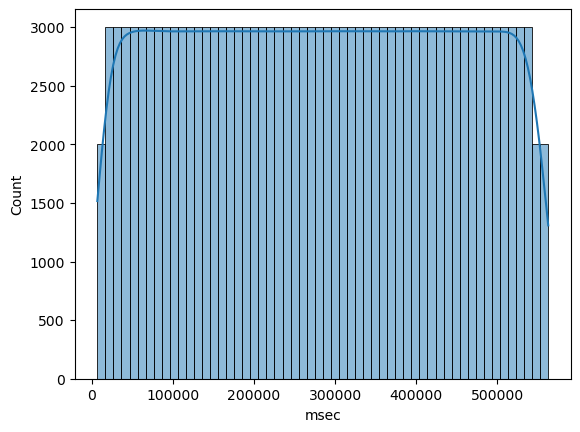

In [5]:
sns.histplot(data = data, x = "msec", kde = True)

### Распределение выглядит нормально.

## Переменная "Zyg"

<AxesSubplot:xlabel='Zyg', ylabel='Count'>

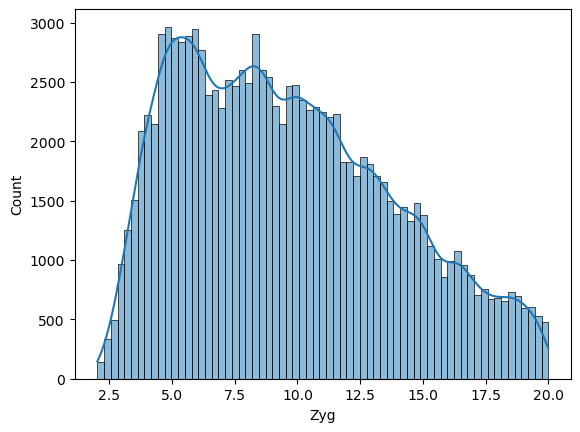

In [6]:
sns.histplot(data = data[data["Zyg"].apply(lambda x: x < 20)], x = "Zyg", kde = True)

### Распределение смещенно влево, что может свидетельствовать о выбросах.

## Переменная "Mas"

<AxesSubplot:xlabel='Mas', ylabel='Count'>

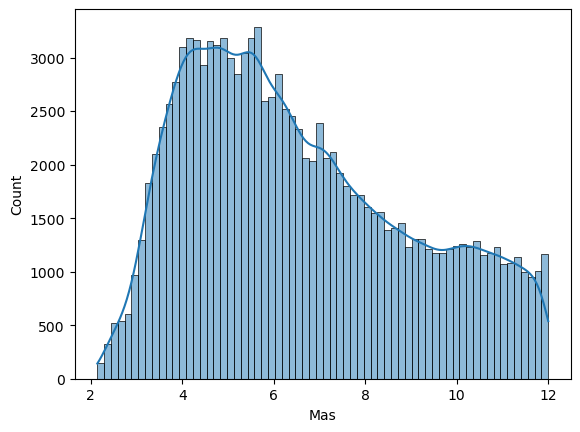

In [7]:
sns.histplot(data = data[data["Mas"].apply(lambda x: x < 12)], x = "Mas", kde = True)

### Распределение смещенно влево, что может свидетельствовать о выбросах.

## Переменная "Corr"

<AxesSubplot:xlabel='Corr', ylabel='Count'>

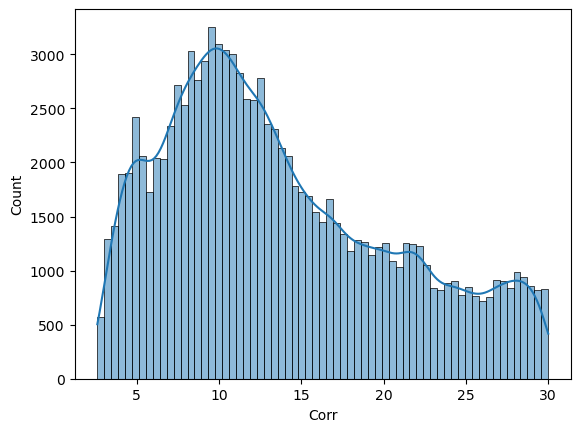

In [8]:
sns.histplot(data = data[data["Corr"].apply(lambda x: x < 30)], x = "Corr", kde = True)

### Распределение смещенно влево, что может свидетельствовать о выбросах.

## Переменная "Valence"

<AxesSubplot:xlabel='Valence', ylabel='Count'>

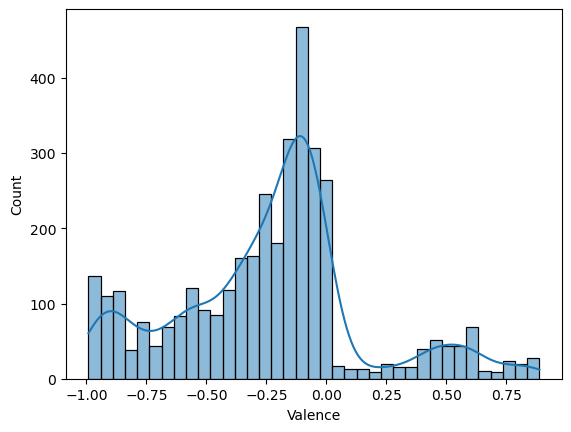

In [9]:
sns.histplot(data = data, x = "Valence", kde = True)

## Переменная "Arousal"

<AxesSubplot:xlabel='Arousal', ylabel='Count'>

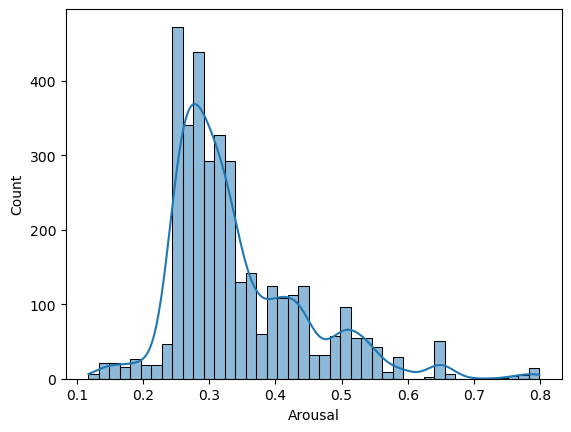

In [10]:
sns.histplot(data = data, x = "Arousal", kde = True)

## Посмотрим на зависимости между переменными

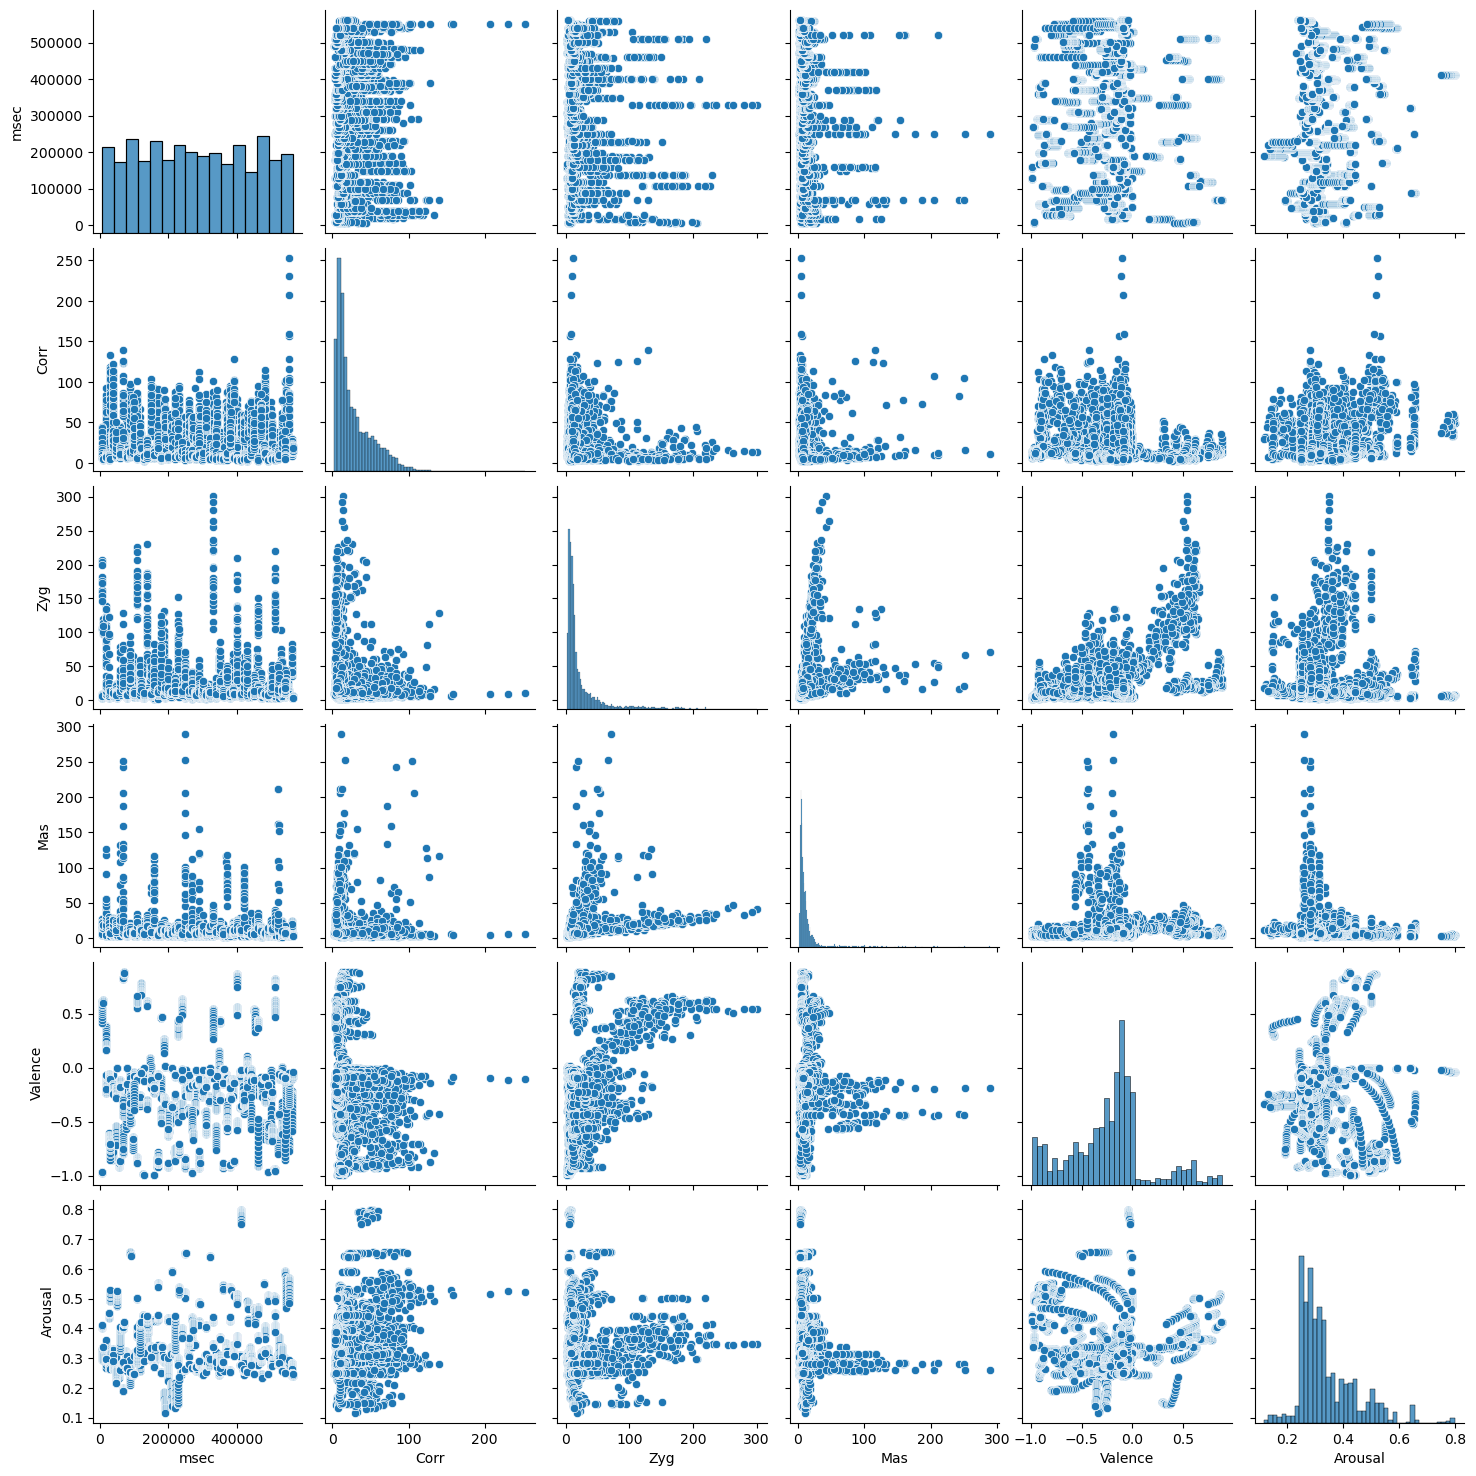

In [11]:
sns.pairplot(data[(data["Arousal"].notna())&(data["Valence"].notna())])

<AxesSubplot:xlabel='label', ylabel='Arousal'>

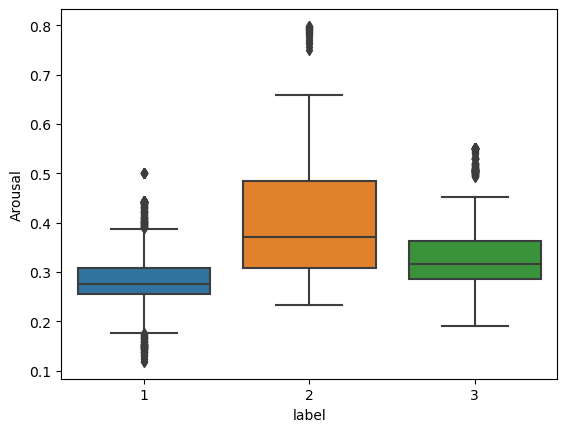

In [12]:
sns.boxplot(data = df, x = "label", y = "Arousal")

<AxesSubplot:xlabel='label', ylabel='Valence'>

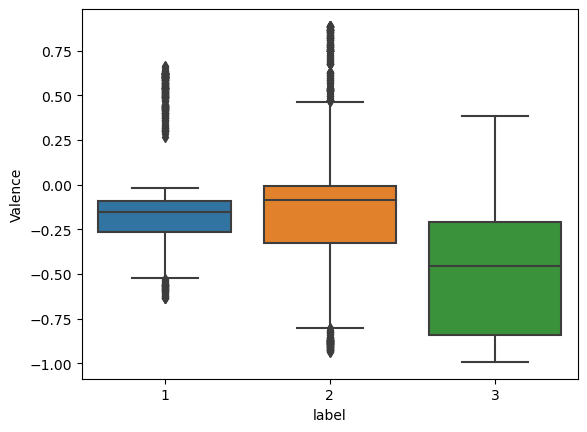

In [13]:
sns.boxplot(data = df, x = "label", y = "Valence")

<AxesSubplot:xlabel='label', ylabel='Zyg'>

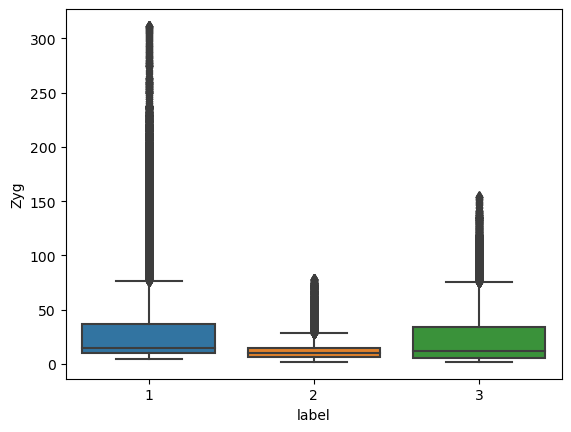

In [14]:
sns.boxplot(data = df, x = "label", y = "Zyg")

<AxesSubplot:xlabel='label', ylabel='Mas'>

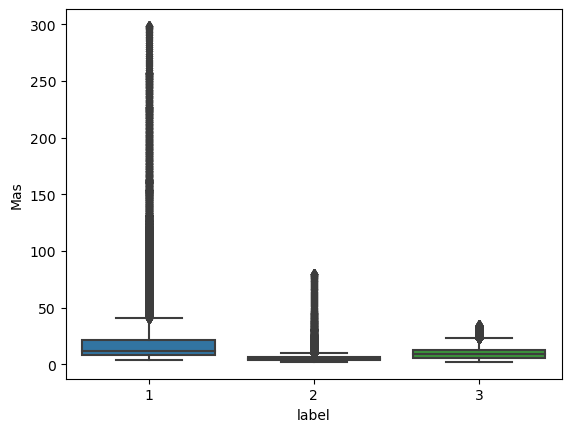

In [15]:
sns.boxplot(data = df, x = "label", y = "Mas")

<AxesSubplot:xlabel='label', ylabel='Corr'>

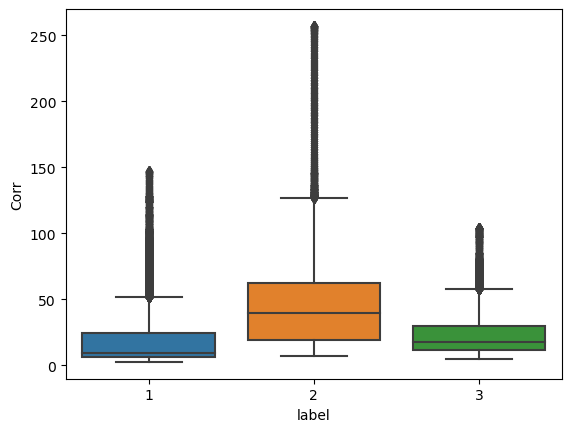

In [16]:
sns.boxplot(data = df, x = "label", y = "Corr")

<AxesSubplot:xlabel='label', ylabel='msec'>

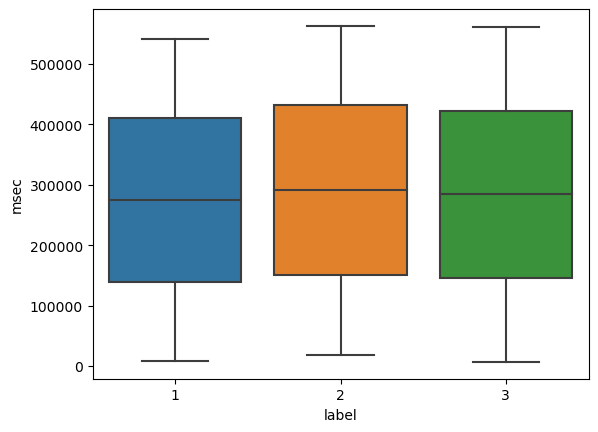

In [17]:
sns.boxplot(data = df, x = "label", y = "msec")

### Из графиков boxplotot видно, что в "Mas", "Zyg", "Corr", "Valence" и "Arousal" присутсвуют выбросы. 

In [18]:
df_corr = data[(df["Arousal"].notna())&(df["Valence"].notna())]

In [141]:
df_corr.corr()

msec      Corr       Zyg       Mas   Valence   Arousal
msec     1.000000 -0.004698 -0.044648 -0.047304  0.022701  0.057306
Corr    -0.004698  1.000000 -0.213923 -0.098048 -0.156296  0.259311
Zyg     -0.044648 -0.213923  1.000000  0.299039  0.439574 -0.030578
Mas     -0.047304 -0.098048  0.299039  1.000000  0.058302 -0.161369
Valence  0.022701 -0.156296  0.439574  0.058302  1.000000 -0.056596
Arousal  0.057306  0.259311 -0.030578 -0.161369 -0.056596  1.000000

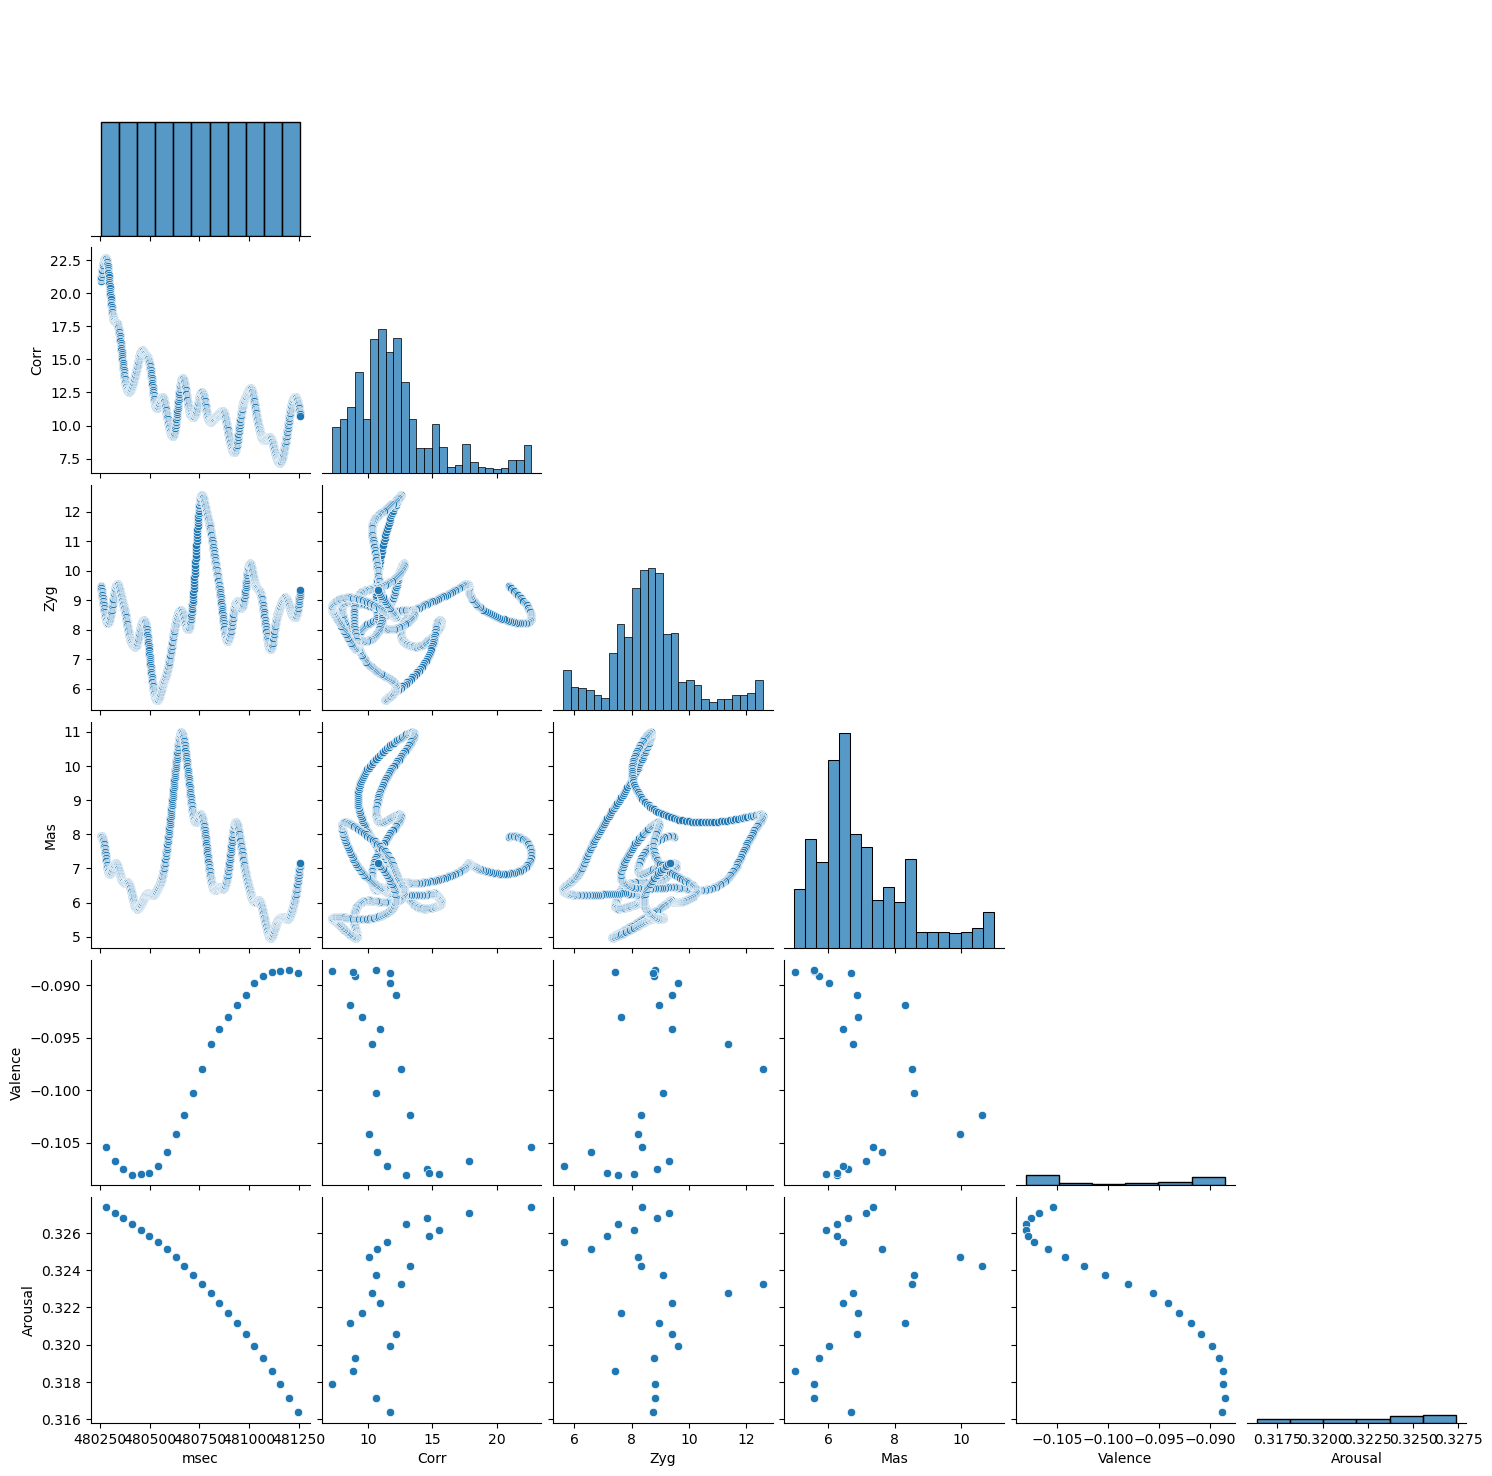

In [15]:
sns.pairplot(data[data["batch_id"] == "1_47"], corner = True)

### Обнаружение в каких сигналах выбросы. 

In [21]:
dict_outlier = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
dict_time = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
dict_median = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
dict_q5 = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
dict_q95 = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}

In [22]:
for name_column in data.columns[1:6]:
    q1 = data[name_column].quantile(q = 0.25)
    q3 = data[name_column].quantile(q = 0.75)
    low = q1-3*(q3-q1)
    high = q3 + 3*(q3-q1)
    for arr_id in data["batch_id"].unique():
        bool_outlier = data[data["batch_id"] == arr_id][name_column].apply(lambda x: (x > high)|(x < low))
        outlier = data[(data["batch_id"] == arr_id)&(bool_outlier)][name_column]
        count_outlier = outlier.count()
        if count_outlier != 0:
            dict_outlier[name_column][arr_id] = outlier
            dict_time[name_column][arr_id] = data[(data["batch_id"] == arr_id)&(bool_outlier)]["msec"]

# Визуализируем выбросы для каждой переменной

### "Corr"

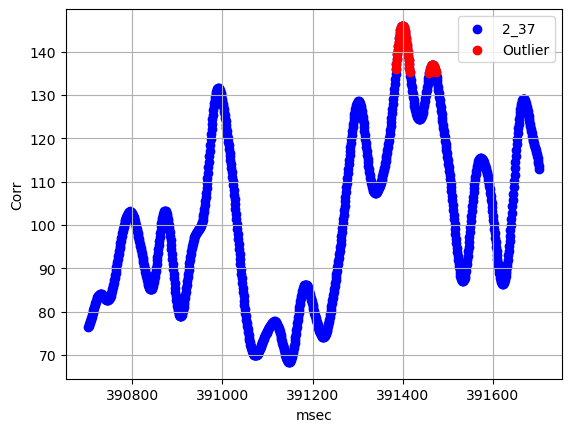

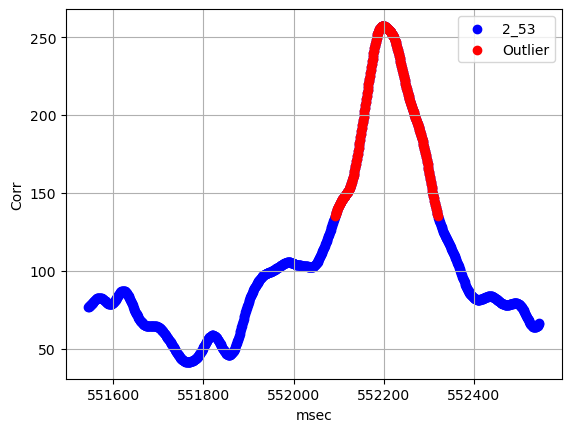

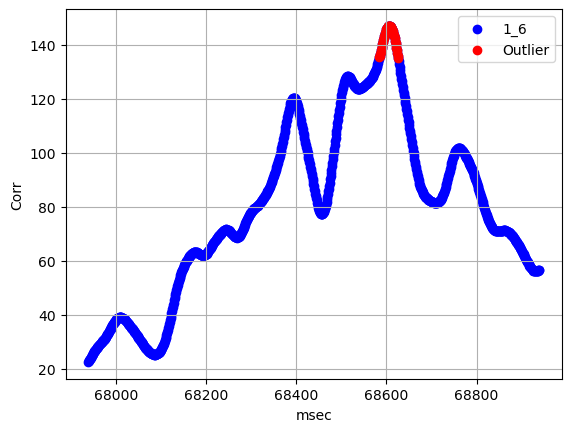

In [23]:
for signal_id in dict_outlier["Corr"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Corr"], color = "b", label = signal_id)
    plt.scatter(x = dict_time["Corr"][signal_id], y = dict_outlier["Corr"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Corr")
    plt.grid()
    plt.show()

### "Mas"

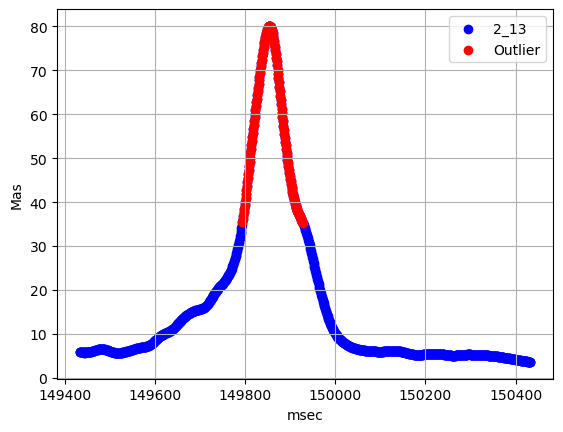

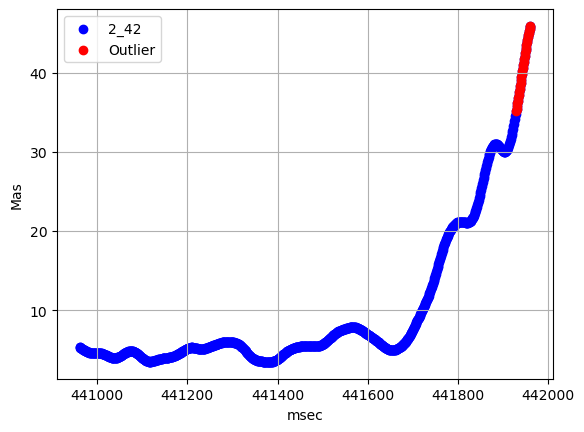

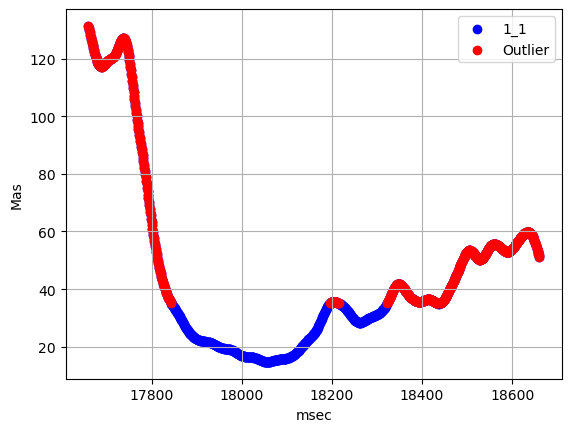

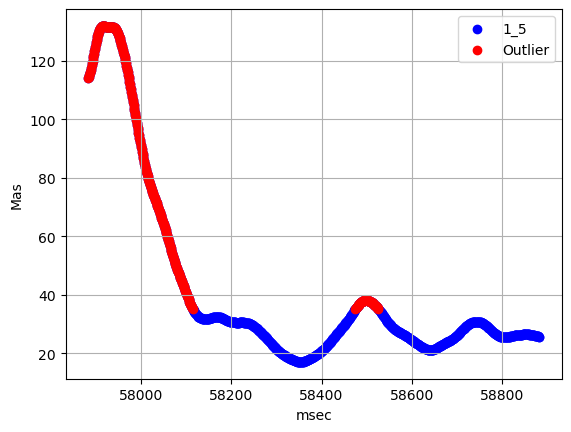

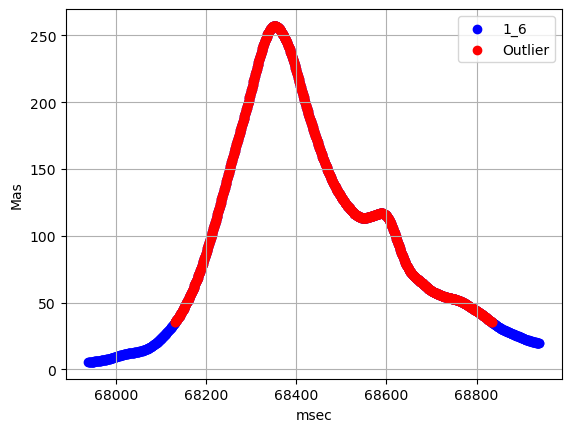

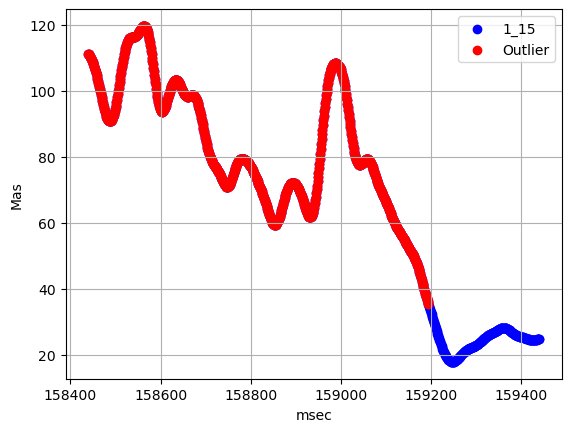

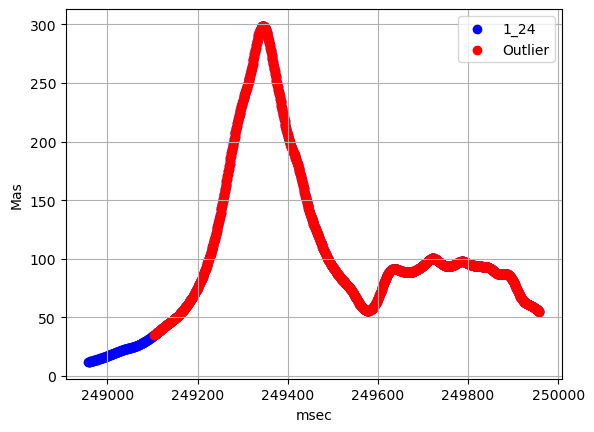

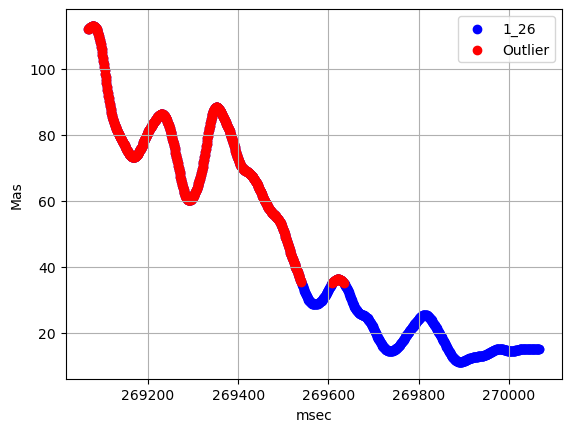

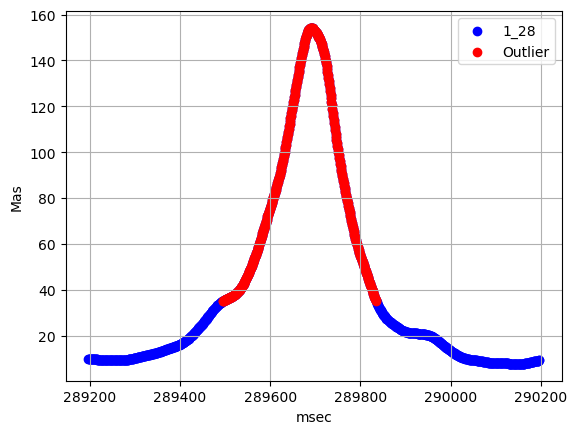

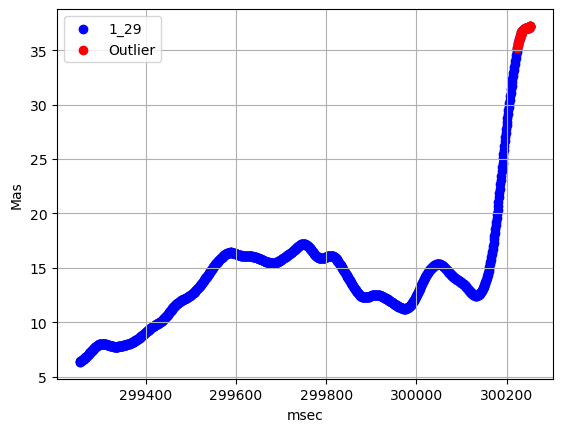

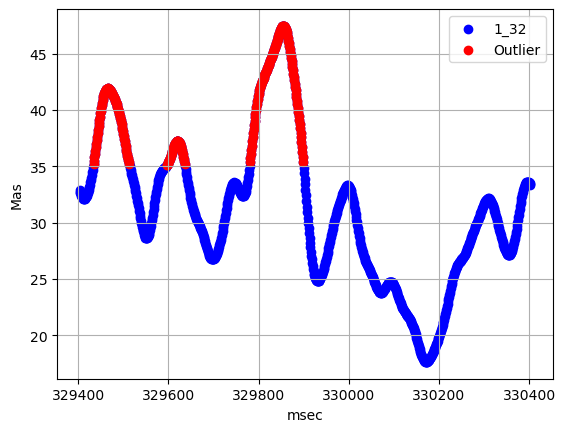

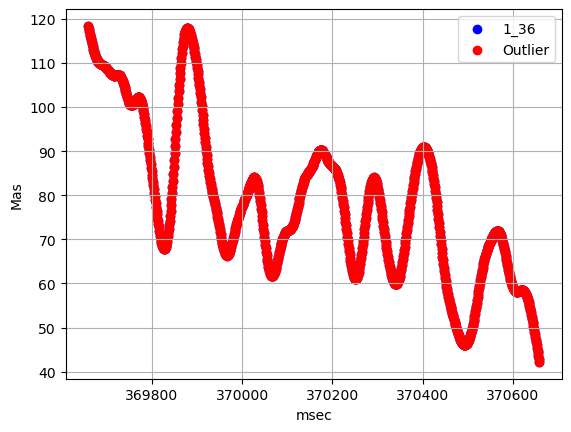

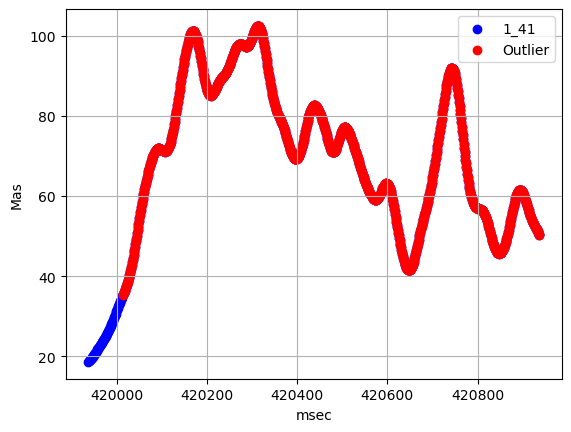

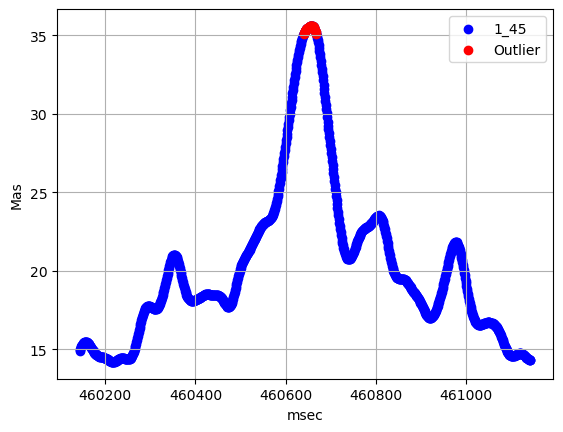

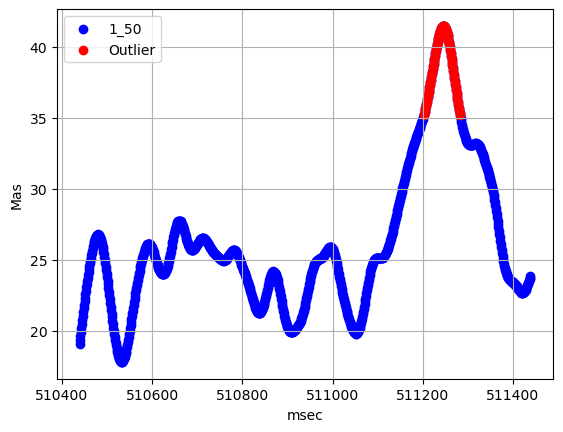

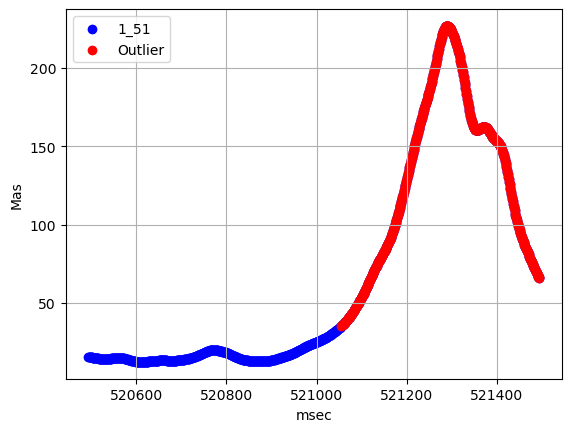

In [24]:
for signal_id in dict_outlier["Mas"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Mas"], color = "b", label = signal_id)
    plt.scatter(x = dict_time["Mas"][signal_id], y = dict_outlier["Mas"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Mas")
    plt.grid()
    plt.show()

### "Zyg"


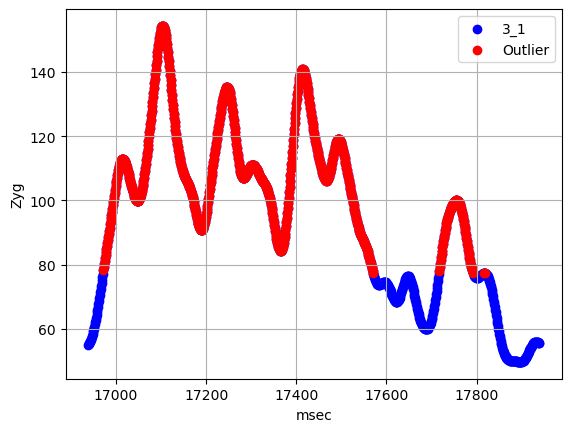

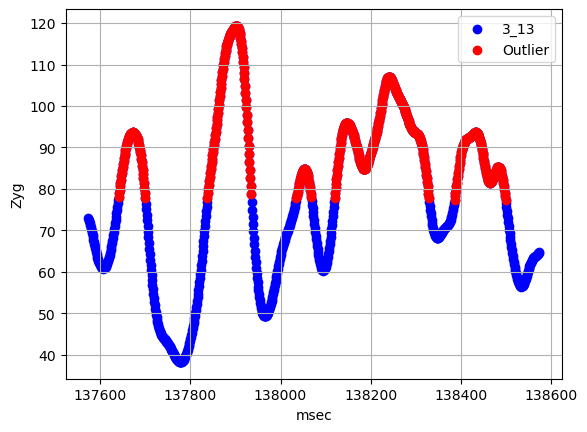

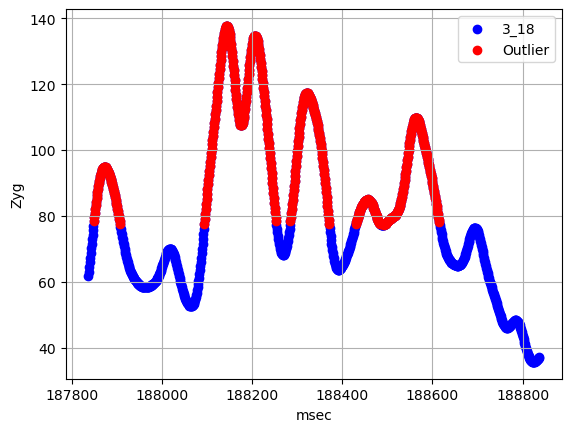

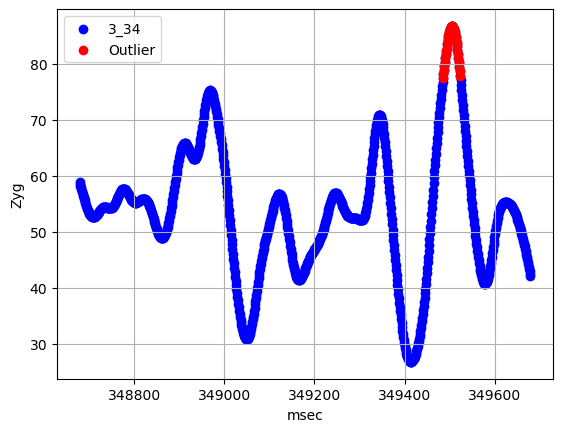

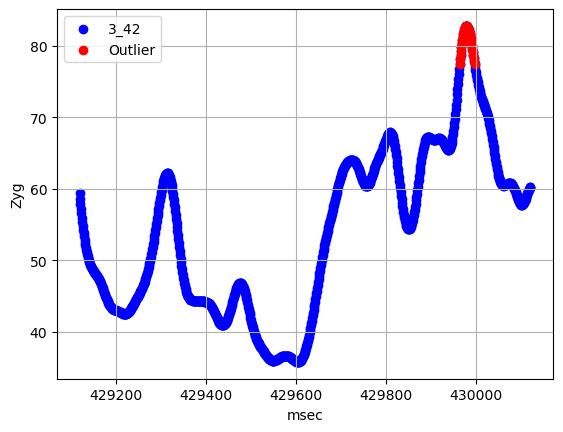

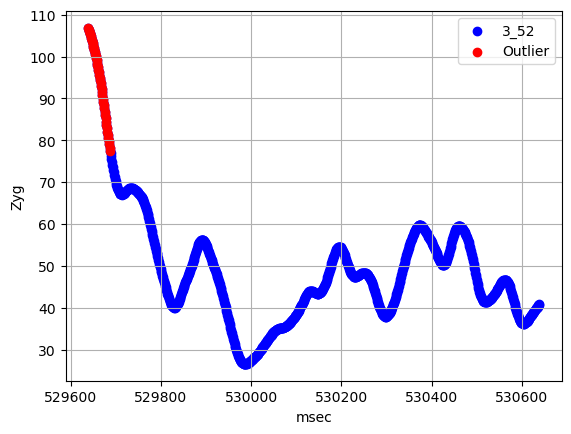

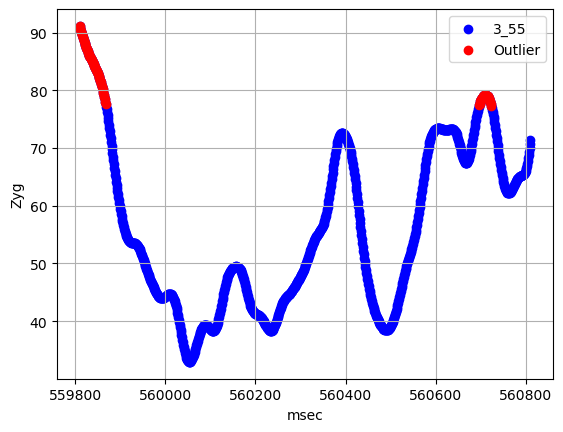

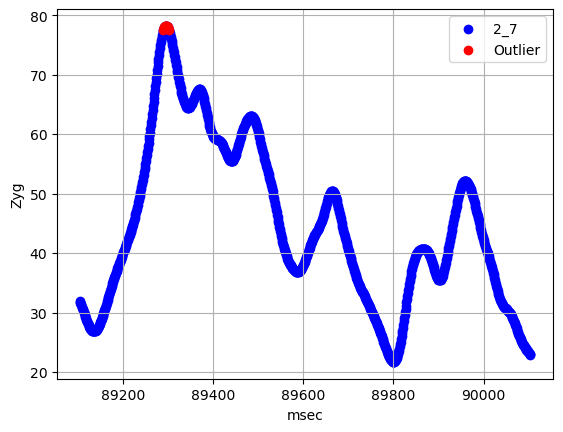

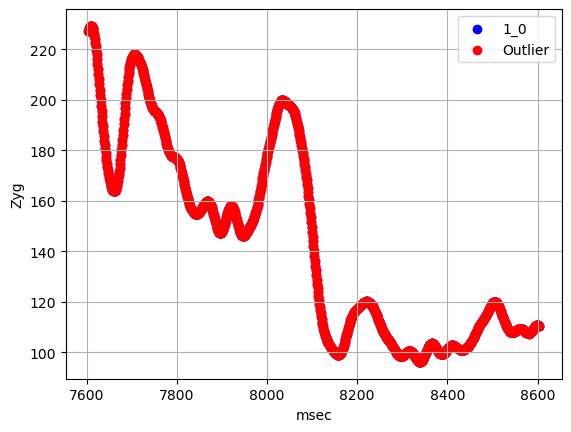

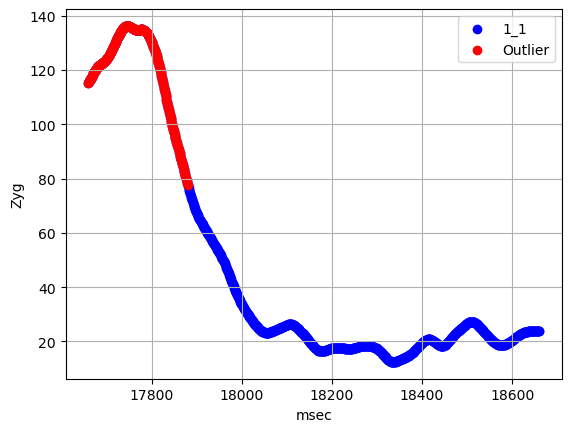

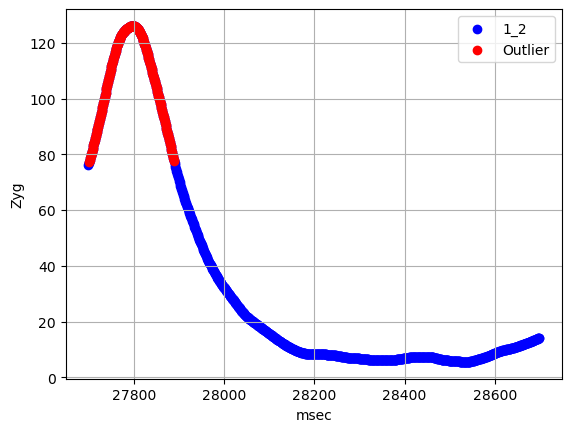

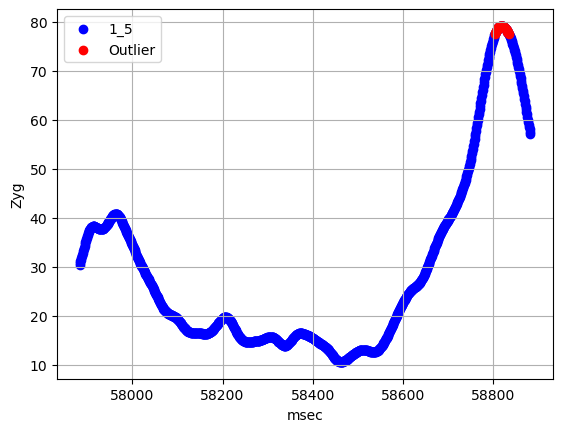

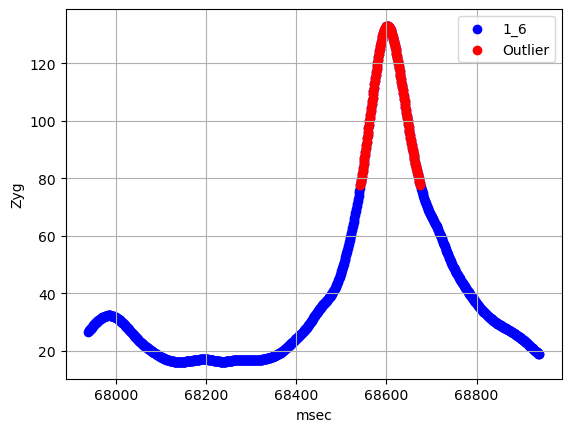

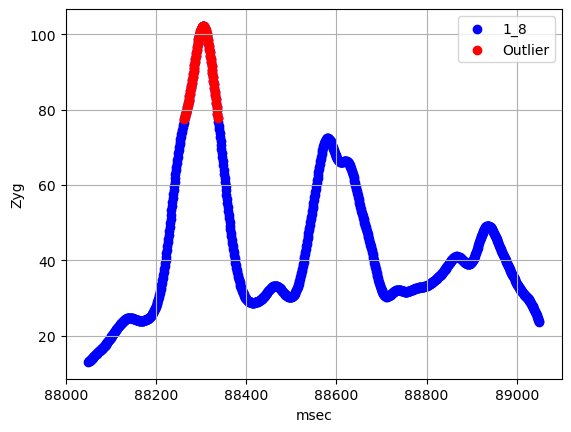

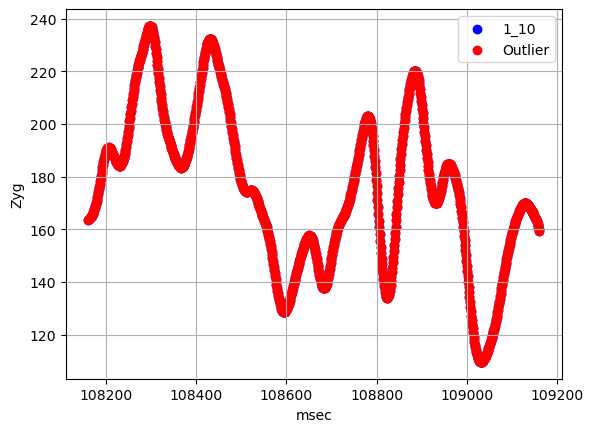

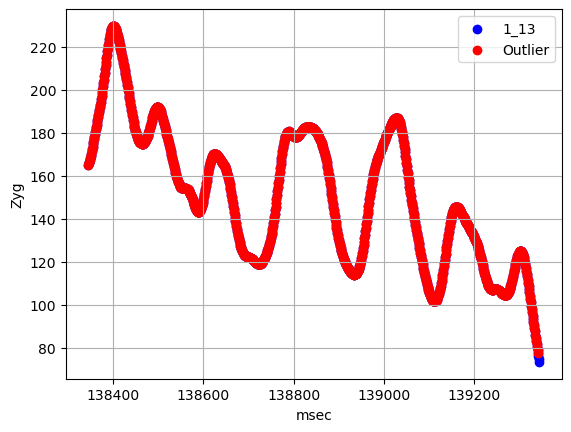

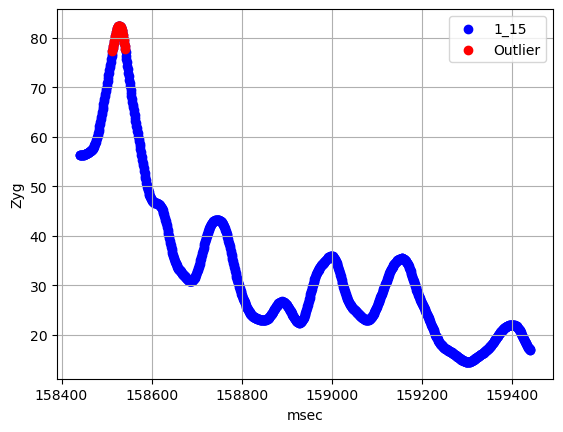

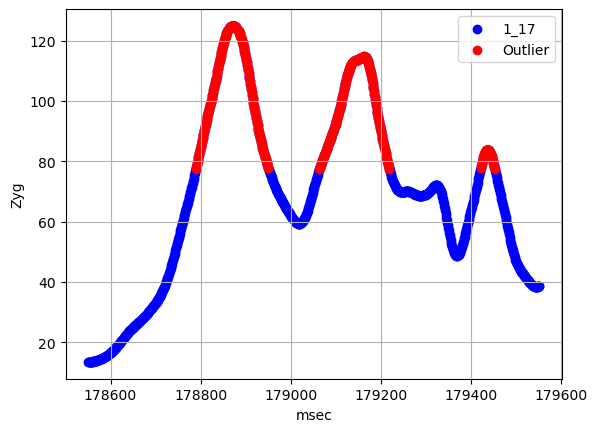

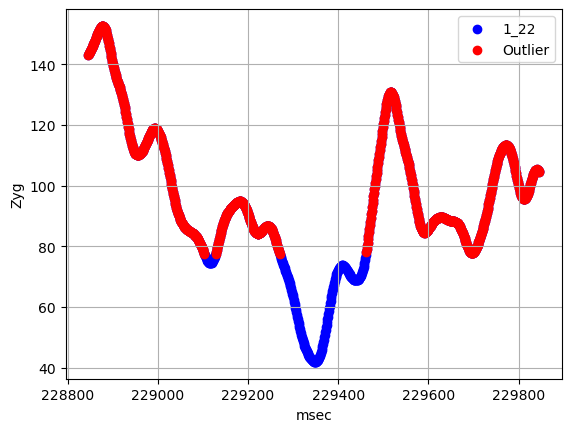

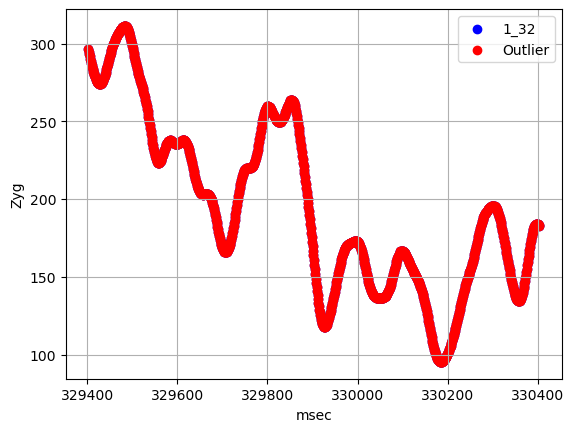

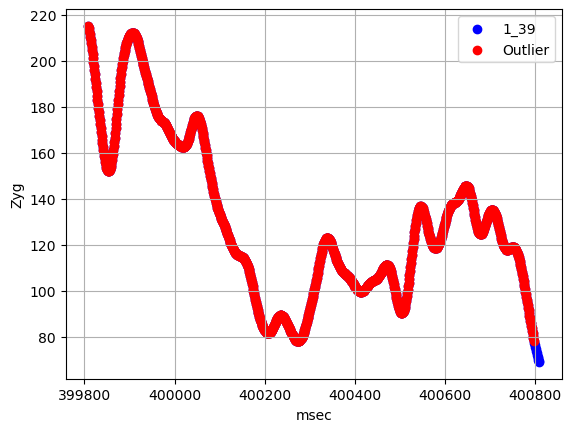

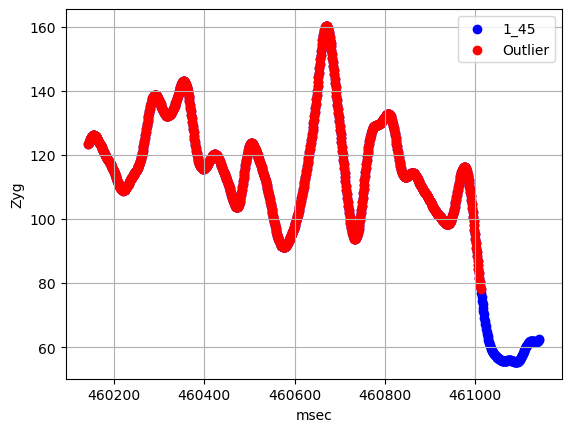

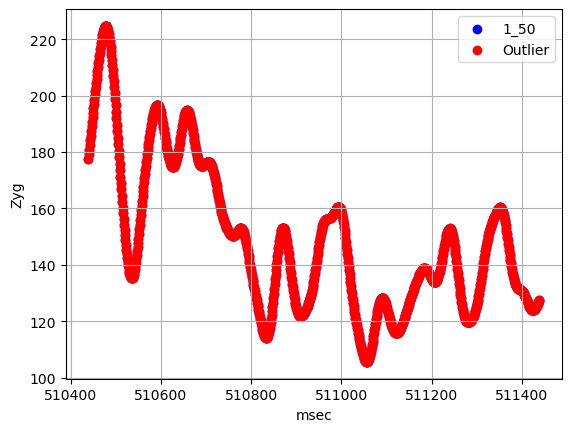

In [25]:
for signal_id in dict_outlier["Zyg"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Zyg"], color = "b", label = signal_id)
    plt.scatter(x = dict_time["Zyg"][signal_id], y = dict_outlier["Zyg"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Zyg")
    plt.grid()
    plt.show()

### "Arousal"

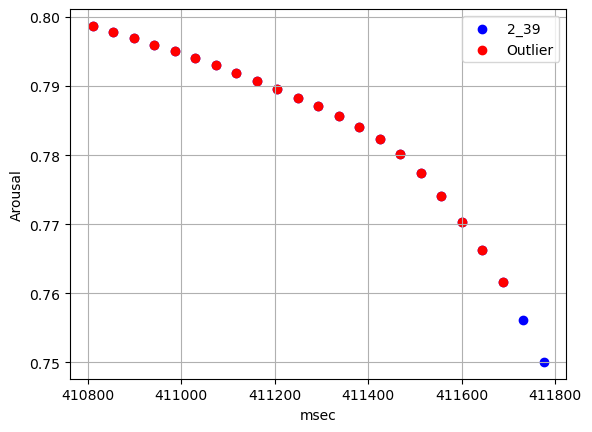

In [26]:
for signal_id in dict_outlier["Arousal"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Arousal"], color = "b", label = signal_id)
    plt.scatter(x = dict_time["Arousal"][signal_id], y = dict_outlier["Arousal"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Arousal")
    plt.grid()
    plt.show()

### "Valence"

In [28]:
for signal_id in dict_outlier["Valence"].keys():
    plt.scatter(x = data[data["batch_id"] == signal_id]["msec"], y = data[data["batch_id"] == signal_id]["Valence"], color = "b")
    plt.scatter(x = dict_time["Valence"][signal_id], y = dict_outlier["Valence"][signal_id], color = "r", label = "Outlier")
    plt.legend()
    plt.xlabel("msec")
    plt.ylabel("Valence")
    plt.grid()
    plt.show()

# Ищу где выбросы являются выбросами, а где просто расширением диапазона сигнала.

In [3]:
def graphic_med(data):
    #Выбросы
    dict_outlier = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    dict_time = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    dict_median = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    dict_q5 = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    dict_q95 = {"Corr":{}, "Zyg":{}, "Mas":{}, "Valence":{}, "Arousal":{}}
    for name_column in data.columns[1:6]:
        q1 = data[name_column].quantile(q = 0.25)
        q3 = data[name_column].quantile(q = 0.75)
        low = q1-3*(q3-q1)
        high = q3 + 3*(q3-q1)
        for arr_id in data["batch_id"].unique():
            bool_outlier = data[data["batch_id"] == arr_id][name_column].apply(lambda x: (x > high)|(x < low))
            outlier = data[(data["batch_id"] == arr_id)&(bool_outlier)][name_column]
            count_outlier = outlier.count()
            if count_outlier != 0:
                dict_outlier[name_column][arr_id] = outlier
                dict_time[name_column][arr_id] = data[(data["batch_id"] == arr_id)&(bool_outlier)]["msec"]
    #Медиана,5 и 95 персентили
    for i in data.columns[1:6]:
        for s_id in data["batch_id"].unique():
            dict_median[i][s_id] = data[data["batch_id"] == s_id][i].median()
            dict_q5[i][s_id] = data[data["batch_id"] == s_id][i].quantile(q = 0.05)
            dict_q95[i][s_id] = data[data["batch_id"] == s_id][i].quantile(q = 0.95)
    med = pd.DataFrame(dict_median)
    q5 = pd.DataFrame(dict_q5)
    q95 = pd.DataFrame(dict_q95)
    med_arr = {"Corr":[], "Zyg":[], "Mas":[], "Valence":[], "Arousal":[]}
    arr_5 = {"Corr":[], "Zyg":[], "Mas":[], "Valence":[], "Arousal":[]}
    arr_95 = {"Corr":[], "Zyg":[], "Mas":[], "Valence":[], "Arousal":[]}
    arr = {"Corr":[], "Zyg":[], "Mas":[], "Valence":[], "Arousal":[]}
    for i in med.columns:
        for j in dict_outlier[i].keys():
            med_arr[i].append(med[i][j])
            arr_5[i].append(q5[i][j])
            arr_95[i].append(q95[i][j])
            arr[i].append(list(med.index).index(j))
    l = med["Corr"].count()
    bool_corr = data["batch_id"].apply(lambda x: x in dict_outlier["Corr"].keys())
    bool_Zyg = data["batch_id"].apply(lambda x: x in dict_outlier["Zyg"].keys())
    bool_Mas = data["batch_id"].apply(lambda x: x in dict_outlier["Mas"].keys())
    df_new = data[~(bool_corr)|(bool_Zyg)|(bool_Mas)]
    for i in med.columns[:3]:
        plt.scatter(np.arange(l), med[i], c = "grey", label = "median")
        plt.scatter(np.arange(l), q5[i], c = "k", label = "0.05")
        plt.scatter(np.arange(l), q95[i], c = "silver", label = "0.95")
        plt.scatter(arr[i], med_arr[i], c = "orange" , label = "out_median")
        plt.scatter(arr[i], arr_5[i], c = "b", label = "out_0.05")
        plt.scatter(arr[i], arr_95[i], c = "r", label = "out_0.95")
        plt.plot(np.arange(l), [data[i].median()]*l, c = "pink", label = "median_norm")
        plt.plot(np.arange(l), [data[i].quantile(q = 0.05)]*l, c = "plum", label = "0.05_norm")
        plt.plot(np.arange(l), [q95[i].quantile(q = 0.95)]*l, c = "m", label = "0.95_norm")
        plt.legend()
        plt.xlabel("N")
        plt.ylabel(i)
        plt.grid()
        plt.show()
    return data[~((bool_Zyg)|(bool_corr)|(bool_Mas))]

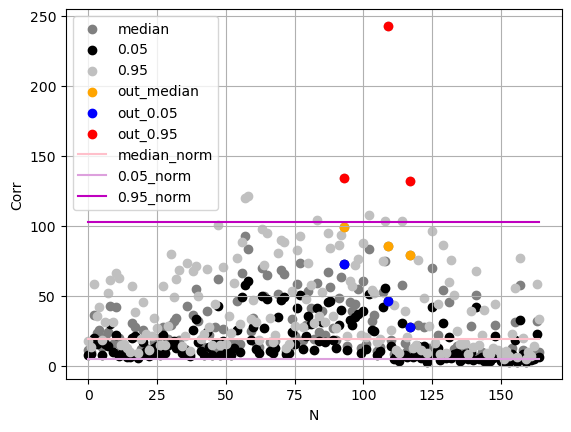

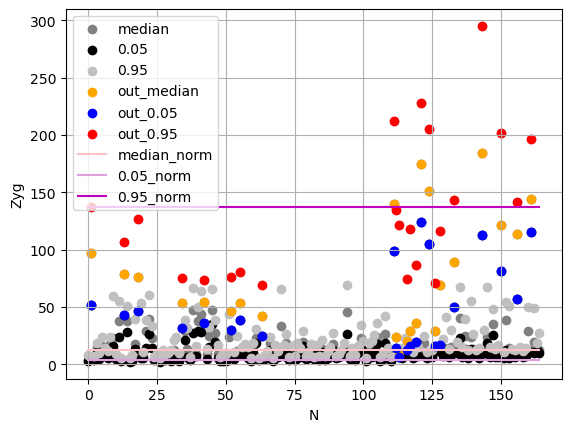

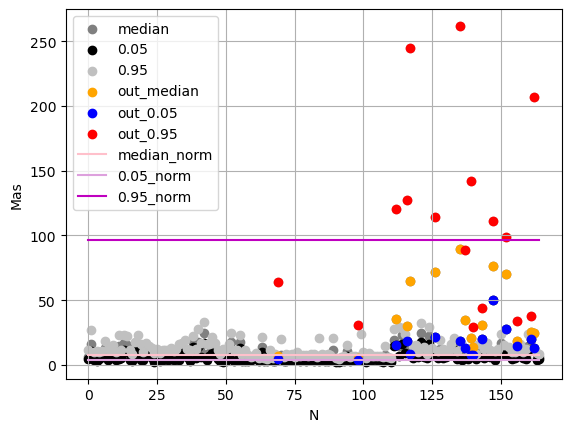

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131131 entries, 0 to 165164
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   msec      131131 non-null  int64  
 1   Corr      131131 non-null  float64
 2   Zyg       131131 non-null  float64
 3   Mas       131131 non-null  float64
 4   Valence   2878 non-null    float64
 5   Arousal   2878 non-null    float64
 6   filename  131131 non-null  object 
 7   label     131131 non-null  int64  
 8   batch_id  131131 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 10.0+ MB


In [4]:
df1 = graphic_med(df)
df1.info()

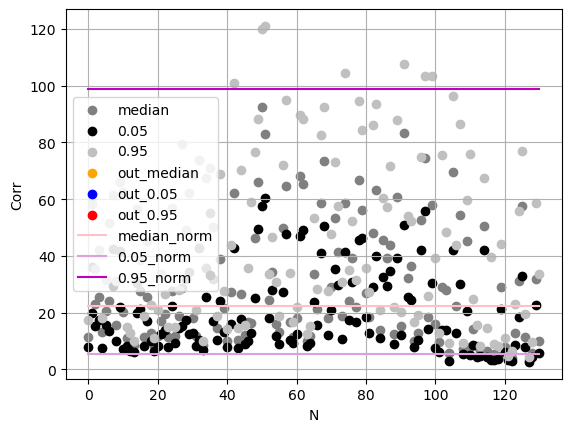

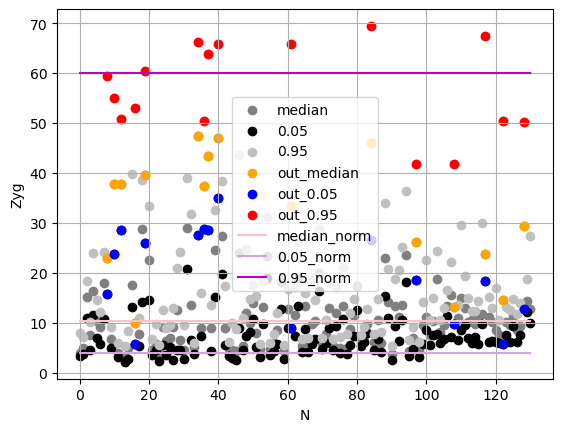

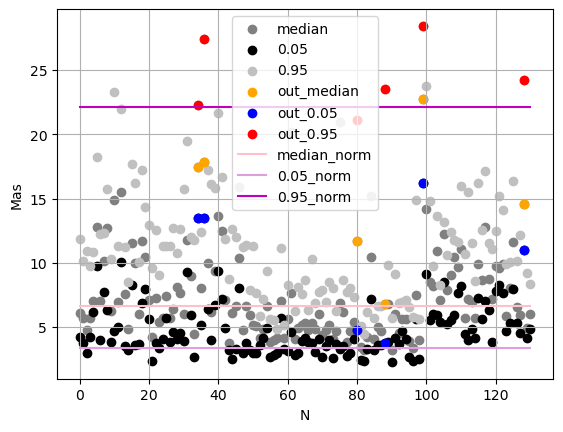

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112112 entries, 0 to 165164
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   msec      112112 non-null  int64  
 1   Corr      112112 non-null  float64
 2   Zyg       112112 non-null  float64
 3   Mas       112112 non-null  float64
 4   Valence   2459 non-null    float64
 5   Arousal   2459 non-null    float64
 6   filename  112112 non-null  object 
 7   label     112112 non-null  int64  
 8   batch_id  112112 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 8.6+ MB


In [5]:
df2 = graphic_med(df1)
df2.info()

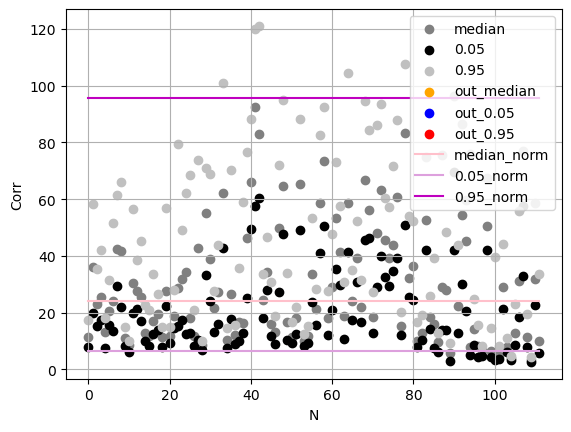

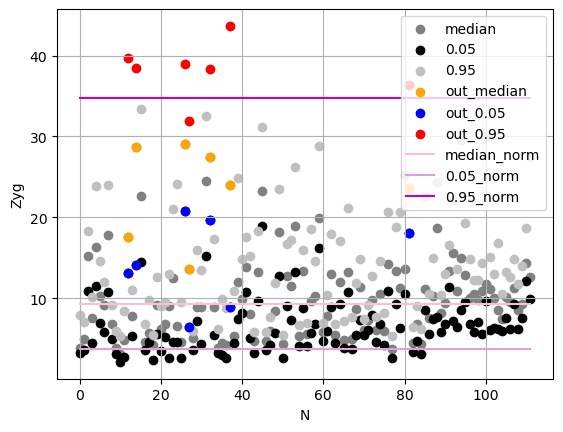

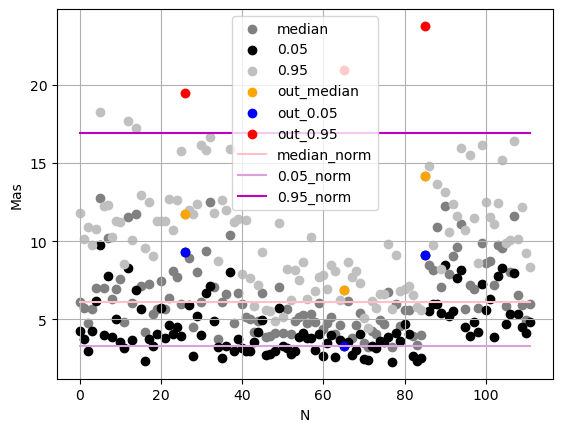

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103103 entries, 0 to 165164
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   msec      103103 non-null  int64  
 1   Corr      103103 non-null  float64
 2   Zyg       103103 non-null  float64
 3   Mas       103103 non-null  float64
 4   Valence   2271 non-null    float64
 5   Arousal   2271 non-null    float64
 6   filename  103103 non-null  object 
 7   label     103103 non-null  int64  
 8   batch_id  103103 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 7.9+ MB


In [6]:
df3 = graphic_med(df2)
df3.info()

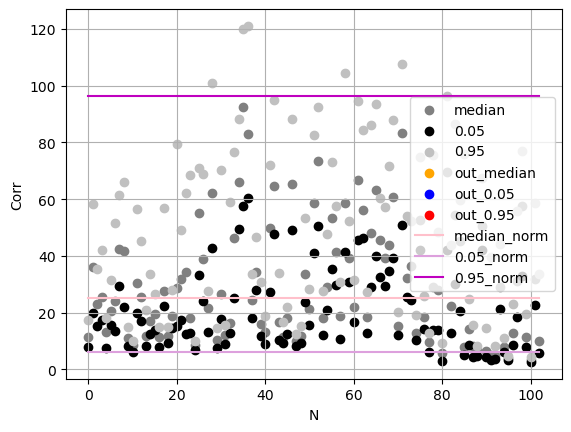

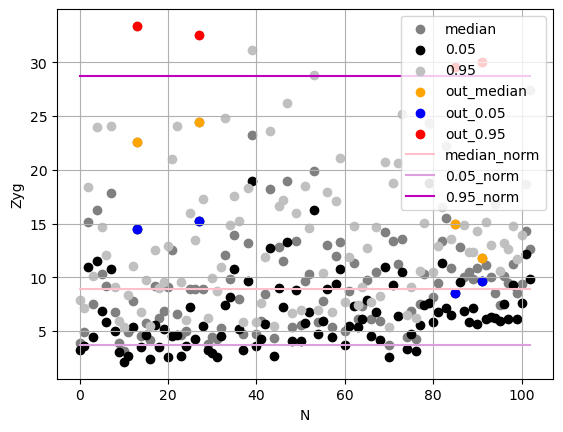

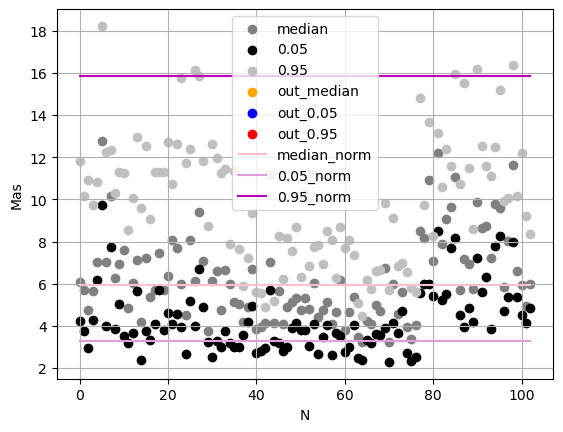

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99099 entries, 0 to 165164
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      99099 non-null  int64  
 1   Corr      99099 non-null  float64
 2   Zyg       99099 non-null  float64
 3   Mas       99099 non-null  float64
 4   Valence   2203 non-null   float64
 5   Arousal   2203 non-null   float64
 6   filename  99099 non-null  object 
 7   label     99099 non-null  int64  
 8   batch_id  99099 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 7.6+ MB


In [7]:
df4 = graphic_med(df3)
df4.info()

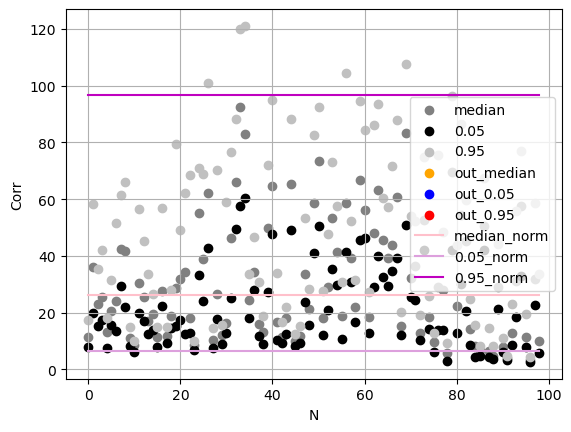

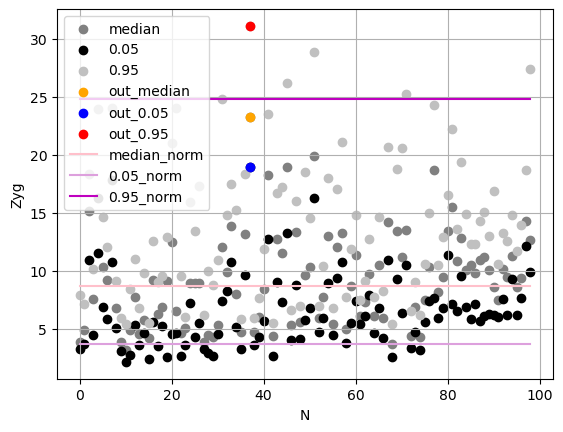

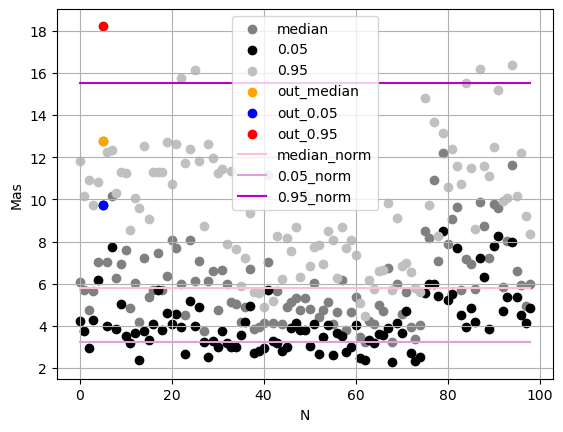

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97097 entries, 0 to 165164
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      97097 non-null  int64  
 1   Corr      97097 non-null  float64
 2   Zyg       97097 non-null  float64
 3   Mas       97097 non-null  float64
 4   Valence   2161 non-null   float64
 5   Arousal   2161 non-null   float64
 6   filename  97097 non-null  object 
 7   label     97097 non-null  int64  
 8   batch_id  97097 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 7.4+ MB


In [8]:
df5 = graphic_med(df4)
df5.info()

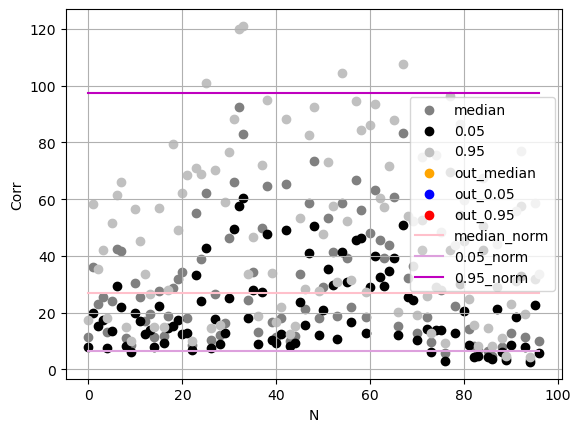

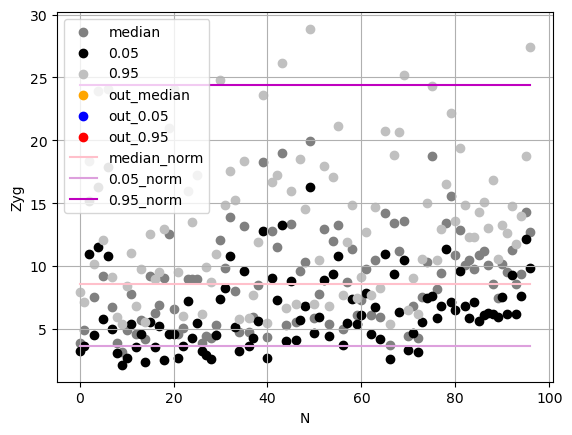

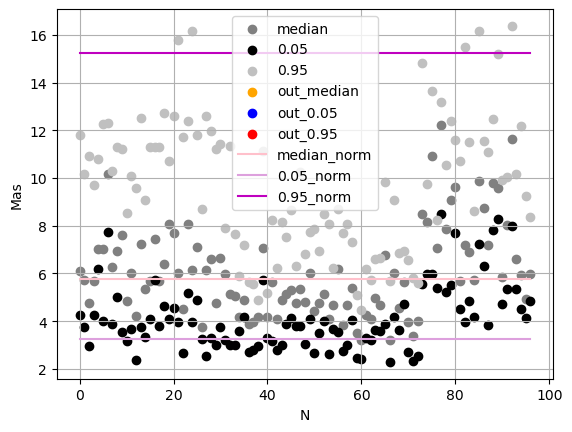

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97097 entries, 0 to 165164
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      97097 non-null  int64  
 1   Corr      97097 non-null  float64
 2   Zyg       97097 non-null  float64
 3   Mas       97097 non-null  float64
 4   Valence   2161 non-null   float64
 5   Arousal   2161 non-null   float64
 6   filename  97097 non-null  object 
 7   label     97097 non-null  int64  
 8   batch_id  97097 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 7.4+ MB


In [9]:
df_new = graphic_med(df5)
df_new.info()

# Так выглядят распределения велечин после устранения всех выбросов. 
### Они стали лучше, но все еще очень смещены влево. 

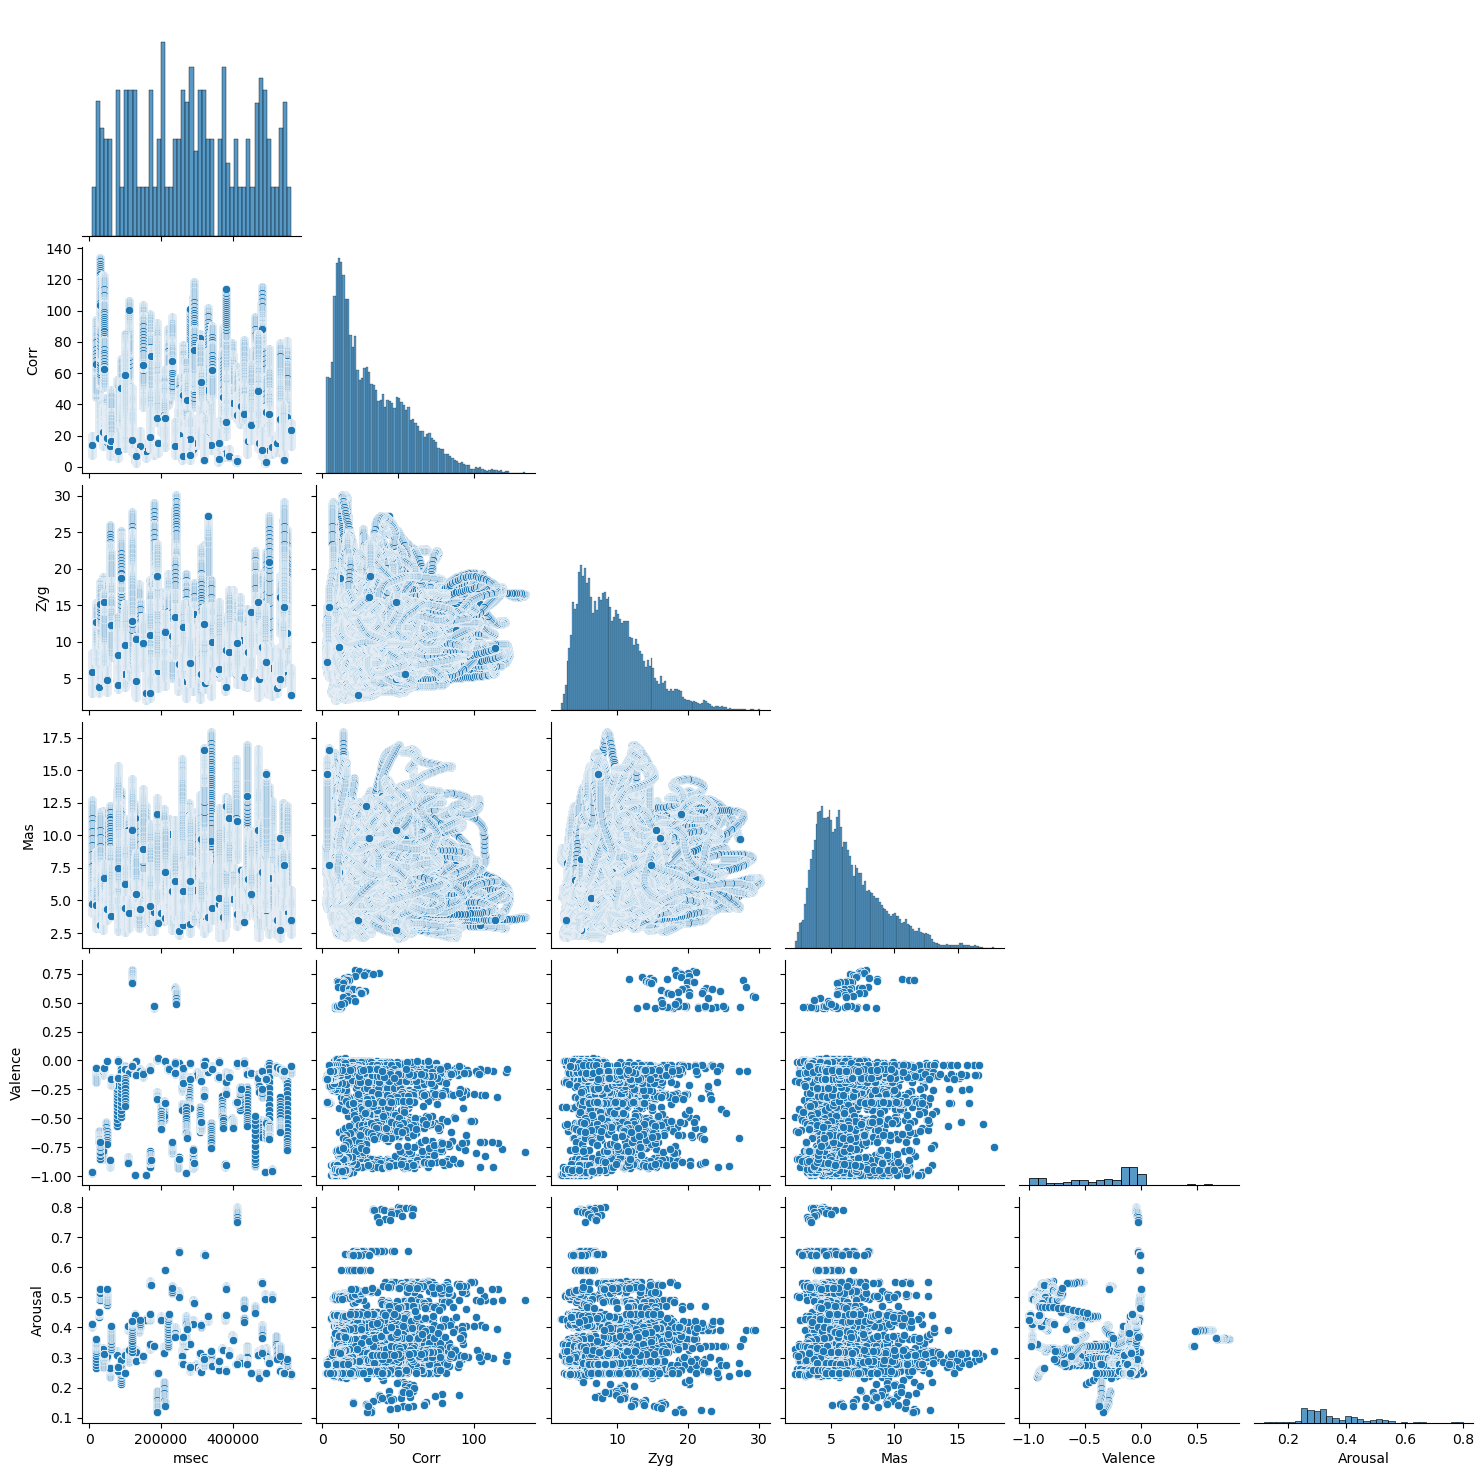

In [10]:
sns.pairplot(data = df_new.drop("label", axis = 1),  corner = True)

## Пробую предсказать arousal и valence.

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn import linear_model 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
d_prob = df_new[(df_new["Valence"].notna())&(df_new["Arousal"].notna())].drop("filename", axis = 1)
data = df[(df["Valence"].notna())&(df["Arousal"].notna())].drop("filename", axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3632 entries, 10 to 165128
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msec      3632 non-null   int64  
 1   Corr      3632 non-null   float64
 2   Zyg       3632 non-null   float64
 3   Mas       3632 non-null   float64
 4   Valence   3632 non-null   float64
 5   Arousal   3632 non-null   float64
 6   label     3632 non-null   int64  
 7   batch_id  3632 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 255.4+ KB


In [13]:
X1 = data[data["label"] == 1]["batch_id"].unique()
X2 = data[data["label"] == 2]["batch_id"].unique()
X3 = data[data["label"] == 3]["batch_id"].unique()
X1_prob = d_prob[d_prob["label"] == 1]["batch_id"].unique()
X2_prob = d_prob[d_prob["label"] == 2]["batch_id"].unique()
X3_prob = d_prob[d_prob["label"] == 3]["batch_id"].unique()

In [14]:
X1_train, X1_test = train_test_split(X1,train_size = 0.7, random_state = 42)
X2_train, X2_test = train_test_split(X2,train_size = 0.7, random_state = 42)
X3_train, X3_test = train_test_split(X3,train_size = 0.7, random_state = 42)
X1_train_prob, X1_test_prob = train_test_split(X1_prob,train_size = 0.7, random_state = 42)
X2_train_prob, X2_test_prob = train_test_split(X2_prob,train_size = 0.7, random_state = 42)
X3_train_prob, X3_test_prob = train_test_split(X3_prob,train_size = 0.7, random_state = 42)

In [15]:
X_train = [*X1_train, *X2_train, *X3_train]
X_test = [*X1_test, *X2_test, *X3_test]
X_train_prob = [*X1_train_prob, *X2_train_prob, *X3_train_prob]
X_test_prob = [*X1_test_prob, *X2_test_prob, *X3_test_prob]

In [16]:
data_train = data[data["batch_id"].apply(lambda x: x in X_train)]
data_test = data[data["batch_id"].apply(lambda x: x in X_test)]
data_train_prob = d_prob[d_prob["batch_id"].apply(lambda x: x in X_train_prob)]
data_test_prob = d_prob[d_prob["batch_id"].apply(lambda x: x in X_test_prob)]

In [2]:
X = data_train.iloc[:,:4]
X_test = data_test.iloc[:,:4]
X_prob = data_train_prob.iloc[:,:4]
X_test_prob = data_test_prob.iloc[:,:4]
y_valence = data_train.iloc[:,4:5]
y_arousal = data_train.iloc[:,5:6]
y_valence_prob = data_train_prob.iloc[:,4:5]
y_arousal_prob = data_train_prob.iloc[:,5:6]
y_valence_test = data_test.iloc[:,4:5]
y_arousal_test = data_test.iloc[:,5:6]
y_valence_test_prob = data_test_prob.iloc[:,4:5]
y_arousal_test_prob = data_test_prob.iloc[:,5:6]

NameError: name 'data_train' is not defined

In [3]:
X_test.head()

NameError: name 'X_test' is not defined

In [263]:
def models_test(X, y, X_test, y_test):
    model_lr = linear_model.LinearRegression()
    model_br = linear_model.BayesianRidge()
    model_en = linear_model.ElasticNet()
    model_svr = SVR()
    model_gbr = GradientBoostingRegressor()
    model_kne = KNeighborsRegressor()
    model_dtr = DecisionTreeRegressor(max_depth = 2, max_features = 1, max_leaf_nodes = 4, min_samples_leaf = 1)
    model_rfr = RandomForestRegressor()
    models = [model_lr, model_br, model_en, model_svr, model_gbr, model_kne, model_dtr, model_rfr]
    m = {"R2_train":{},"MAE_train":{},"MSE_train":{}, "R2_test":{},"MAE_test":{},"MSE_test":{}}
    for model in models:
        model.fit(X, y) 
        l = str(model)
        m["R2_train"][l[:l.index('(')]] = r2_score(y, model.predict(X))
        m["MAE_train"][l[:l.index('(')]] = mean_absolute_error(y, model.predict(X))
        m["MSE_train"][l[:l.index('(')]] = mean_squared_error(y, model.predict(X))
        m["R2_test"][l[:l.index('(')]] = r2_score(y_test, model.predict(X_test))
        m["MAE_test"][l[:l.index('(')]] = mean_absolute_error(y_test, model.predict(X_test))
        m["MSE_test"][l[:l.index('(')]] = mean_squared_error(y_test, model.predict(X_test))
    return pd.DataFrame(m)

In [264]:
TestModelsArousal = models_test(X, y_arousal, X_test, y_arousal_test)
TestModelsValence = models_test(X, y_valence, X_test, y_valence_test)
#TestModelsArousalProb = models_test(X_prob, y_arousal_prob, X_test_prob, y_arousal_test_prob)
#TestModelsValenceProb = models_test(X_prob, y_valence_prob, X_test_prob, y_valence_test_prob)

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11932\2137015983.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

In [265]:
TestModelsArousal

R2_train  MAE_train  MSE_train   R2_test  MAE_test  \
LinearRegression           0.109725   0.073457   0.009964  0.007922  0.077718   
BayesianRidge              0.109720   0.073467   0.009964  0.007869  0.077754   
ElasticNet                 0.062056   0.076311   0.010497 -0.015146  0.080517   
SVR                       -0.010804   0.083882   0.011312 -0.125906  0.086859   
GradientBoostingRegressor  0.793842   0.036931   0.002307 -0.194156  0.080510   
KNeighborsRegressor        0.959978   0.005891   0.000448 -1.984589  0.116150   
DecisionTreeRegressor      0.066283   0.075942   0.010450 -0.015916  0.080693   
RandomForestRegressor      0.984176   0.007176   0.000177 -0.259416  0.079806   

                           MSE_test  
LinearRegression           0.008541  
BayesianRidge              0.008541  
ElasticNet                 0.008739  
SVR                        0.009693  
GradientBoostingRegressor  0.010280  
KNeighborsRegressor        0.025694  
DecisionTreeRegressor      0.008746  
RandomForestRegressor      0.010842

In [266]:
TestModelsValence

R2_train  MAE_train  MSE_train   R2_test  MAE_test  \
LinearRegression           0.292781   0.245436   0.099973  0.033599  0.345044   
BayesianRidge              0.292775   0.245397   0.099974  0.034500  0.344783   
ElasticNet                 0.280800   0.247756   0.101666  0.057610  0.337333   
SVR                        0.003491   0.276207   0.140867 -0.010615  0.322105   
GradientBoostingRegressor  0.784471   0.138788   0.030467 -0.033596  0.347685   
KNeighborsRegressor        0.966199   0.023305   0.004778 -0.339231  0.372872   
DecisionTreeRegressor      0.257525   0.243646   0.104957 -0.005488  0.332647   
RandomForestRegressor      0.984145   0.029337   0.002241 -0.021983  0.346828   

                           MSE_test  
LinearRegression           0.176818  
BayesianRidge              0.176654  
ElasticNet                 0.172425  
SVR                        0.184908  
GradientBoostingRegressor  0.189113  
KNeighborsRegressor        0.245034  
DecisionTreeRegressor      0.183970  
RandomForestRegressor      0.186988

#### Первые модели переобучились. Попробуем подобрать параметры моделей с помощью GridSearchCV. 

# DecisionTreeRegressor подбор параметров

### Что с этим делать?  
##### В каждом запуске GridSearchCV в одном и том же диапазоне параметров, значение $R^2$ меняется. Причем даже при лучших параметрах данной модели, значение $R^2$ для тестовых данных намного хуже, чем для тренировочных. Модель переобучаетя, как это исправить я пока не придумал. И нужно ли это исправлять, может быть просто модель плохая?

In [237]:
parameters = {'max_depth':np.arange(1, 7, 1), 'max_features':np.arange(1, 4, 1), 'max_leaf_nodes':np.arange(2,7,1), 'min_samples_leaf':np.arange(1, 7, 1)}
model_dtr = DecisionTreeRegressor()
clf = GridSearchCV(model_dtr, parameters, scoring='r2', cv = 2)

In [238]:
val = clf.fit(X, y_valence)
print(f'score valence:{val.best_score_}')
print(f'params valence:{val.best_params_}')
#aro = clf.fit(X, y_arousal)
#print(f'score arousal:{aro.best_score_}')
#print(f'params arousal:{aro.best_params_}')

score valence:0.010685620921278116
params valence:{'max_depth': 2, 'max_features': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 3}


In [239]:
val = clf.fit(X, y_valence)
print(f'score valence:{val.best_score_}')
print(f'params valence:{val.best_params_}')

score valence:0.02447784349988341
params valence:{'max_depth': 2, 'max_features': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 4}


In [240]:
val = clf.fit(X, y_valence)
print(f'score valence:{val.best_score_}')
print(f'params valence:{val.best_params_}')

score valence:0.03232729184205935
params valence:{'max_depth': 2, 'max_features': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 5}


# RandomForestRegressor подбор параметров

### Тоже все плохо с $R^2$

In [241]:
parameters = {'max_leaf_nodes':np.arange(40,53), 'min_samples_leaf':np.arange(10,21)}
model_rfr = RandomForestRegressor(max_features = 1, max_depth = 2)
clf = GridSearchCV(model_rfr, parameters, scoring='r2', cv = 2)

In [242]:
val = clf.fit(X, y_valence)
print(f'score valence:{val.best_score_}')
print(f'params valence:{val.best_params_}')

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

score valence:-0.12084265088648816
params valence:{'max_leaf_nodes': 44, 'min_samples_leaf': 19}


C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# GradientBoostingRegressor подбор параметров

In [267]:
parameters = {'max_depth': np.arange(1,6), 'min_samples_leaf': np.arange(1, 6), 'min_samples_split': np.arange(1, 6), 'max_leaf_nodes': np.arange(1, 6)}
model_gbr = GradientBoostingRegressor()
clf = GridSearchCV(model_gbr, parameters, scoring='r2', cv = 2)

In [268]:
val = clf.fit(X, y_valence)
print(f'score valence:{val.best_score_}')
print(f'params valence:{val.best_params_}')

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score valence:-0.12021531835026755
params valence:{'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}


C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 668, in fit
    n_stages = self._fit_stages(
  File "C:\Users\User\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 745, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\User\miniconda3\lib\s

# KNeighborsRegressor подбор параметров

In [245]:
parameters = {'n_neighbors':np.arange(1, 200)}
model_knn = KNeighborsRegressor()
clf = GridSearchCV(model_knn, parameters, scoring='r2', cv = 2)

In [246]:
val = clf.fit(X, y_valence)
print(f'score valence:{val.best_score_}')
print(f'params valence:{val.best_params_}')

score valence:-0.33203521550781656
params valence:{'n_neighbors': 192}


# SVR подбор параметров

In [261]:
parameters = {'kernel':['liner', 'poly', 'rdf', 'sigmoid']}
model_SVR = SVR()
clf = GridSearchCV(model_SVR, parameters, scoring='r2', cv = 2)

In [262]:
val = clf.fit(X, y_valence)
print(f'score valence:{val.best_score_}')
print(f'params valence:{val.best_params_}')

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

score valence:-0.2254666180055167
params valence:{'kernel': 'poly'}


In [ ]:
parameters = {'degree': np.arange(1,10,1)}
model_SVR = SVR(kernel = 'poly')
clf = GridSearchCV(model_SVR, parameters, scoring='r2', cv = 2)

In [259]:
val = clf.fit(X, y_valence)
print(f'score valence:{val.best_score_}')
print(f'params valence:{val.best_params_}')

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

score valence:-0.1805012112755524
params valence:{'degree': 8}
